In [44]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import dsn.lib.LowRank.Fig1_Spontaneous.fct_mf as mf

from dsn.util.tf_DMFT_solvers import rank2_CDD_static_solve

DTYPE = tf.float64

n = 1


cA = 0.0*np.ones((n,))
cB = 0.0*np.ones((n,))

_delta_0_init = 10.0*np.ones((n,))

_g = 0.8*np.ones((n,))

_rhom = 1.6*np.ones((n,)) 
_rhon = 3.0*np.ones((n,))
_betam = 0.6*np.ones((n,))
_betan = 1.0*np.ones((n,))

gammaA = 0.08*np.ones((n,))
gammaB = -0.14*np.ones((n,))

"""_rhom = -0.38818384*np.ones((n,)) 
_rhon = 2.39911416*np.ones((n,))
_betam = -1.91615091*np.ones((n,))
_betan = 2.35561441*np.ones((n,))"""

kappa1_init = tf.placeholder(dtype=DTYPE, shape=(n,))
kappa2_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_0_init = tf.placeholder(dtype=DTYPE, shape=(n,))
delta_inf_init = tf.placeholder(dtype=DTYPE, shape=(n,))

g = tf.placeholder(dtype=DTYPE, shape=(n,))
rhom = tf.placeholder(dtype=DTYPE, shape=(n,))
rhon = tf.placeholder(dtype=DTYPE, shape=(n,))
betam = tf.placeholder(dtype=DTYPE, shape=(n,))
betan = tf.placeholder(dtype=DTYPE, shape=(n,))


high_eps = 0.8
low_eps = 0.2
many_its = 200
trend_its = 10
few_its = 50
eps_scheds = [np.linspace(high_eps, high_eps, many_its),
              np.linspace(low_eps, low_eps, many_its),
              np.linspace(high_eps, low_eps, many_its),
              np.concatenate((np.linspace(high_eps, low_eps, trend_its),
                              np.linspace(low_eps, low_eps, many_its-trend_its)), 
                             axis=0)
              ]

gqp = 50


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
kappa_sign = -1

_kappa1_init = kappa_sign*2.2*np.ones((n,))
_kappa2_init = kappa_sign*2.0*np.ones((n,))

kappa1s = []
kappa2s = []
delta0s = []
num_eps_scheds = len(eps_scheds)
for i in range(num_eps_scheds):
    print(i)
    eps_sched = eps_scheds[i]
    
    kappa1, kappa2, delta_0, z, xs = rank2_CDD_static_solve(kappa1_init, kappa2_init, delta_0_init, \
                                                     cA, cB, \
                                                     g, rhom, rhon, betam, betan, \
                                                     gammaA, gammaB, \
                                                     its, eps_sched, gauss_quad_pts=gqp, db=True)

    feed_dict = {kappa1_init:_kappa1_init, kappa2_init:_kappa2_init, delta_0_init:_delta_0_init, \
                 g:_g, rhom:_rhom, rhon:_rhon, betam:_betam, betan:_betan}

    with tf.Session() as sess:
        _kappa1, _kappa2, _delta_0, _z, _xs = sess.run([kappa1, kappa2, delta_0, z, xs], feed_dict)

    kappa1s.append(_xs[:,0,:])
    kappa2s.append(_xs[:,1,:])
    delta0s.append(_xs[:,2,:])
    
    

0
1
2
3


No handles with labels found to put in legend.


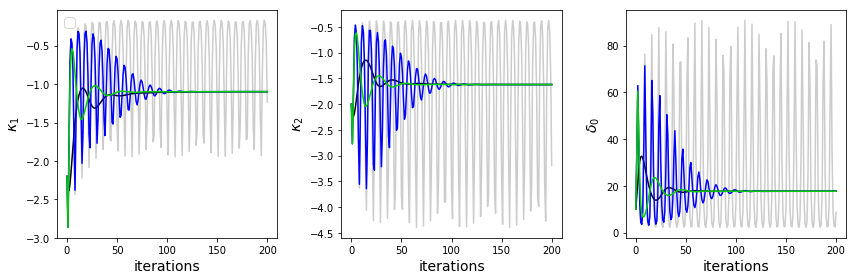

In [46]:
fontsize = 14
fig, axs = plt.subplots(1,3,figsize=(12,4))
linestrs = ['-', '-', '-', '-']
colors = [[0.8, 0.8, 0.8],
          [0.0, 0.0, 0.0],
          [0.0, 0.0, 1.0],
          [0.0, 0.8, 0.0],
         ]
for i in range(num_eps_scheds):
    axs[0].plot(kappa1s[i][0], linestrs[i], c=colors[i])
    axs[1].plot(kappa2s[i][0], linestrs[i], c=colors[i])
    axs[2].plot(delta0s[i][0], linestrs[i], c=colors[i]) #c=[0,0,float(i)/float(num_eps_scheds)])

axs[0].legend(fontsize=fontsize)
for i in range(3):
    axs[i].set_xlabel('iterations', fontsize=fontsize)
axs[0].set_ylabel(r'$\kappa_1$', fontsize=fontsize)
axs[1].set_ylabel(r'$\kappa_2$', fontsize=fontsize)
axs[2].set_ylabel(r'$\delta_0$', fontsize=fontsize)
plt.tight_layout()